# PyQt5


## 日期

In [1]:
from PyQt5.QtCore import QDate, QTime, QDateTime, Qt

now = QDate.currentDate()

print(now.toString(Qt.ISODate))
print(now.toString(Qt.DefaultLocaleLongDate))

datetime = QDateTime.currentDateTime()

print(datetime.toString())

time = QTime.currentTime()

print(time.toString(Qt.DefaultLocaleLongDate))


2024-04-13
2024年4月13日
周六 4月 13 22:09:45 2024
GMT+8 22:09:45


## 过程式编程样例

In [2]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget


def main():

    app = QApplication(sys.argv)

    w = QWidget()
    w.resize(250, 150) #窗体大小
    w.move(300, 300) #窗体位置
    w.setWindowTitle('Simple')#窗体名称
    w.show()

    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


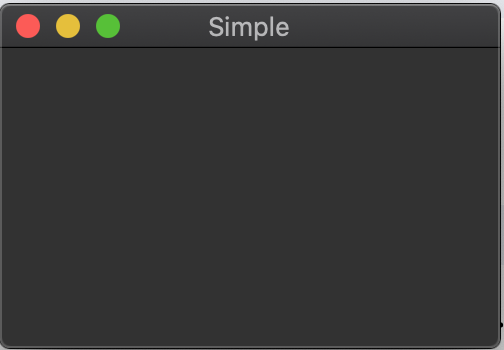
* PyQt5必须定义一个application对象: 
    - app = QApplication(sys.argv)
* QWidget窗体基类
* sys.exit(app.exec_())在主回路里等待事件发生，接收,派遣，处理；当窗体删除时退出程序

## 面向对象式样例


In [3]:


"""
ZetCode PyQt5 tutorial

This example shows an icon
in the titlebar of the window.

Author: Jan Bodnar
Website: zetcode.com
"""

import sys
from PyQt5.QtWidgets import QApplication, QWidget
from PyQt5.QtGui import QIcon
import os

current_file_path = os.getcwd() #__file__
print(f"current_file_path: {current_file_path}")


class Example(QWidget): #继承QWidget

    def __init__(self): #子类初始化
        super(Example, self).__init__() #父类初始化

        self.initUI() #委托函数


    def initUI(self):

        self.setGeometry(300, 300, 300, 220)# 前两个参数定位窗体，后两个参数设置大小(宽，高)
        self.setWindowTitle('Icon')
        self.setWindowIcon(QIcon(os.path.join(current_file_path, 'web.png')))

        self.show()


def main():

    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

current_file_path: /Users/liuchuanxi/MyBlog/blog_backup/source/_posts/PyQt5


## QToolTip

In [1]:

"""
ZetCode PyQt5 tutorial

This example shows a tooltip on
a window and a button.

Author: Jan Bodnar
Website: zetcode.com
"""

import sys
from PyQt5.QtWidgets import (QWidget, QToolTip,
    QPushButton, QApplication)
from PyQt5.QtGui import QFont


class Example(QWidget):

    def __init__(self):
        super().__init__()

        self.initUI()


    def initUI(self):
        #设置工具提示文字字体
        QToolTip.setFont(QFont('SansSerif', 10))

        #在窗体中创建一个工具提示文字
        self.setToolTip('This is a <b>QWidget</b> widget')

        #在窗体中创建按钮 
        #param1: str
        #param2: QWidget
        btn = QPushButton('Button', self)
        #在按钮中中创建一个工具提示文字
        btn.setToolTip('This is a <b>QPushButton</b> widget')
        btn.resize(btn.sizeHint())
        btn.move(50, 50)

        self.setGeometry(300, 300, 300, 200)
        self.setWindowTitle('Tooltips')
        self.show()


def main():

    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

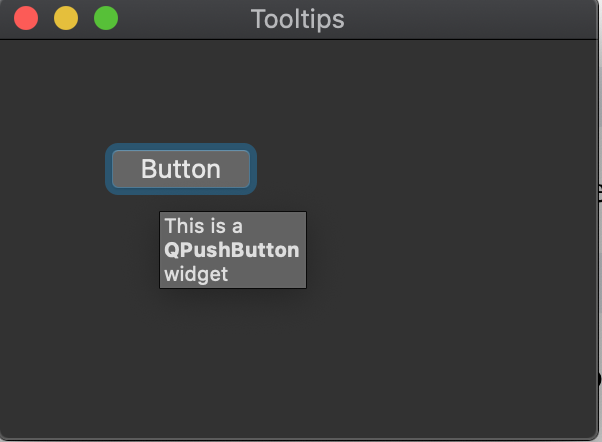
<!-- 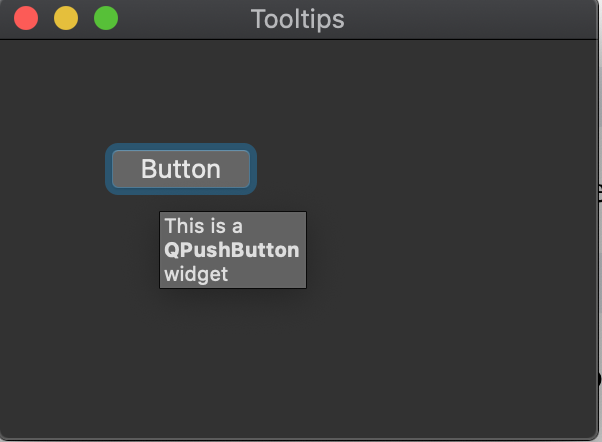 -->
Widget可以看成是一座金字塔，一层在另一层的上面放置，比如按钮窗体放在基本窗体之上

## 信号与槽

In [1]:
"""
ZetCode PyQt5 tutorial

This program creates a quit
button. When we press the button,
the application terminates.

Author: Jan Bodnar
Website: zetcode.com
"""

import sys
from PyQt5.QtWidgets import QWidget, QPushButton, QApplication

class Example(QWidget):

    def __init__(self):
        super().__init__()

        self.initUI()


    def initUI(self):

        qbtn = QPushButton('Quit', self)
        qbtn.clicked.connect(QApplication.instance().quit)
        qbtn.resize(qbtn.sizeHint())
        qbtn.move(50, 50)

        self.setGeometry(300, 300, 350, 250)
        self.setWindowTitle('Quit button')
        self.show()


def main():

    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

通过信号与槽功能实现点击quit按钮退出程序, PyQt5用信号与槽机制搭建事件处理系统。
* qbtn.clicked.connect(QApplication.instance().quit)
    - 点击按钮时clicked信号发出
    - 槽功能可以由Qt槽或者python函数实现
    - connect连接了信号和槽
    - 信号的发送者：button, 信号接收者或者槽函数执行者：QApplication.instance()应用程序对象，槽函数：quit
* 事件处理
    - 当说到事件的处理和调度时，意思是 QCoreApplication 或 QApplication 会从操作系统接收各种事件，并将这些事件发送到应用程序中的适当对象进行处理。例如，当用户点击按钮、移动鼠标或按键盘时，这些事件首先由操作系统捕获，然后被 Qt 框架捕获并发送给相应的 GUI 组件进行处理。
* 事件循环
    - 在 Qt 中，当你使用 GUI 应用程序时，通常会创建一个 QApplication 对象来管理应用程序的整个生命周期和 GUI 事件循环。QApplication.instance() 是一个静态方法，它返回当前正在运行的 QApplication 实例的指针。如果没有运行的 QApplication 实例，这个方法会返回 None。
    - QCoreApplication 是 Qt 的非 GUI 应用程序或者没有图形界面的应用程序使用的类。它是 QApplication 的基类，用于处理事件循环和其他与应用程序生命周期相关的任务。
    - 事件循环是 GUI 应用程序中的一个重要概念。它是一个无限循环，等待并处理各种事件，如用户输入、系统事件、定时器事件等。
    - 主事件循环是 GUI 应用程序中的核心部分，它负责从操作系统接收事件并将这些事件分发到适当的对象进行处理。这是 GUI 应用程序响应用户操作、更新界面和执行其他任务的地方。

### 逻辑图
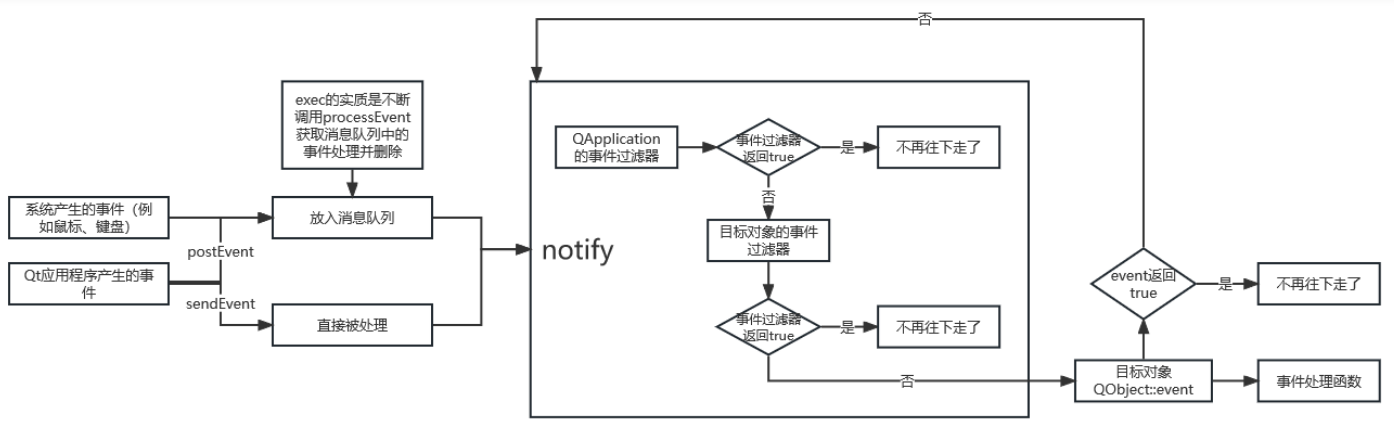
事件主要有两种，一种是系统产生的事件，还有一种是Qt应用程序本身产生的事件，postEvent这个函数会把这些事件存放到一个消息队列中。程序一开始的QApplication::exec是开启一个事件循环，他的本质就是不断地调用processEvent这个函数获取消息队列中的事件去处理并删除，因为这个删除是delete操作，所以要求消息队列中的事件是在堆上的。除了postEvent还有一个函数叫做sendEvent，这个函数不会把事件放入到消息队列中，而是立马执行。所以sendEvent是同步的，而通过事件循环的是异步的。同步的事件会阻塞其他代码的执行，直到同步事件处理完，异步则不用等。

事件的处理是要往下传递的。从notiy开始。如果QApplication本身安装了事件过滤器，那么它将对所有的事件进行过滤。如果返回true，就不往下传递了，如果返回false则继续往下传递。然后看看目标对象是否安装了事件过滤器，如果安装了事件过滤器，就要进行过滤。如果返回true，表示被拦截了，事件将不会再往下传递；如果返回false，则可以继续往下传递。

事件过滤器是这样安装的：如果要对A事件安装事件过滤器，而监听A事件的对象是B，就重写B的eventFilter，调用A的成员函数installEventFilter，参数是B（当然这个B也可以是A本身），这样就完成了事件过滤器的安装。QApplication安装事件过滤器也是这样。installEventFilter会把参数里头的监听者，放入到一个QObjectList中，执行的顺序是先放进去的后执行。

如果事件过滤器返回的是false，就继续往下传递，到event这个函数做事件的分发。事件分发是自己给自己分发，主要作用就是调用对应的事件处理函数。但是它有个返回值，如果返回false，则该事件会继续传递到它的父组件，父组件从notify开始，继续往下走，执行上面所说的过程。如果返回是true，则表示这个事件就到了这里了，不会再到父组件。

### Qt事件系统
#### 什么是事件循环
在Qt中，事件循环是一种机制，用于处理各种异步事件。事件循环通过一个事件队列来管理和调度事件，当队列中有事件时，事件循环会从队列中依次取出事件并处理，直到队列为空或者事件循环被中断。
#### 事件循环如何产生
事件的产生可以分为两种：

1. 程序外部产生：指系统产生的事件，例如鼠标按下（MouseButtonPress）、按键按下（KeyPress）等。Qt通过捕捉系统事件，将其封装成自己的QEvent类，再将事件发送出去。

2. 程序内部产生：指在代码中手动创建一个事件，然后通过sendEvent/postEvent将事件发送到事件循环中。其中，sendEvent是阻塞型的发送方式，会等待事件处理完成后再继续执行；而postEvent是非阻塞型的发送方式，会将事件放入事件队列中，并立即返回。

#### 事件是如何处理的
让我们通过一个流程图简单了解事件从发出到处理的过程。在接下来的解析中，我们将通过分析源代码，逐步验证流程图中的每个步骤。请各位读者耐心继续往下阅读
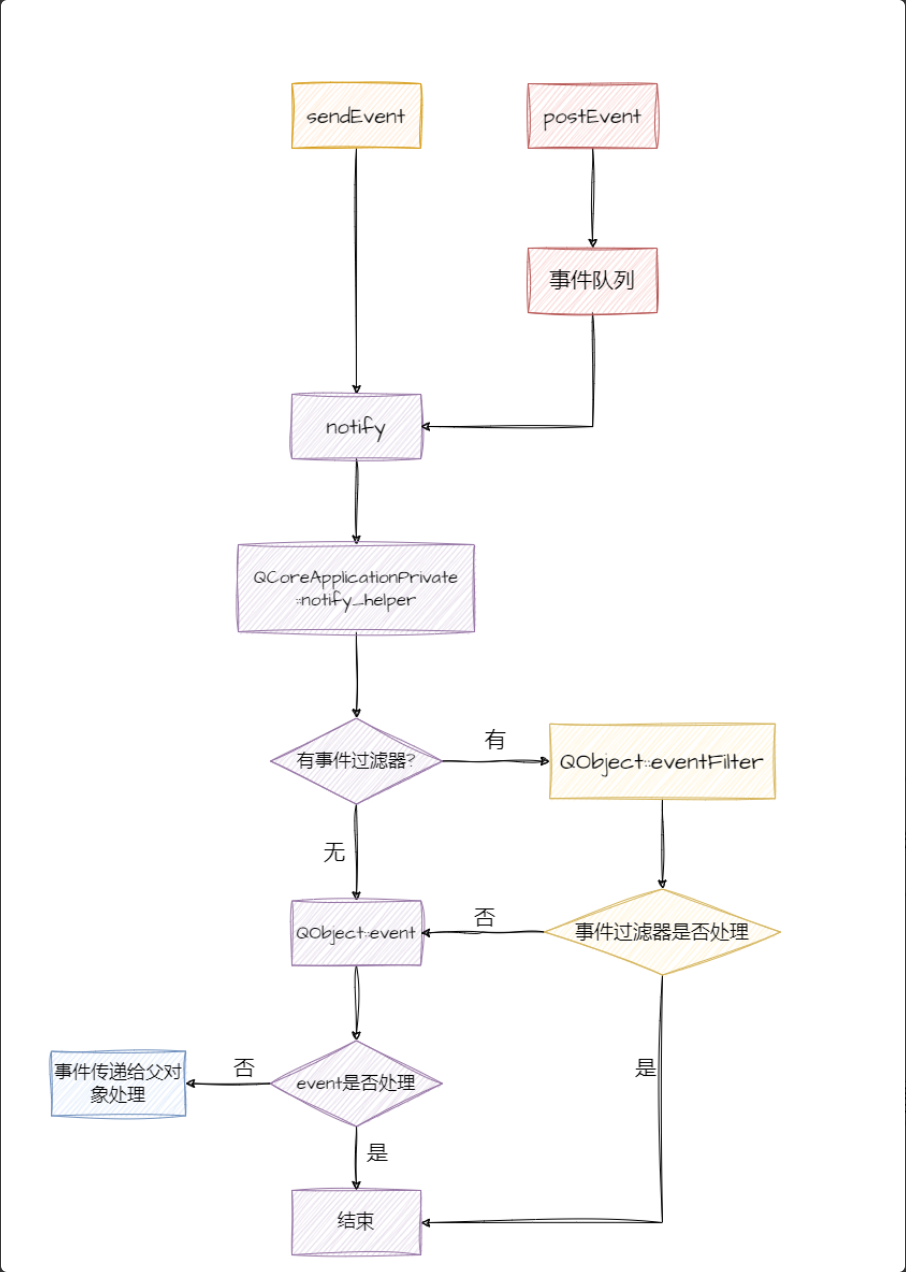

##### sendEvent
首先，我们看sendEvent：
```c++
bool QCoreApplication::sendEvent(QObject *receiver, QEvent *event)
{
	// sendEvent是阻塞调用
    Q_TRACE(QCoreApplication_sendEvent, receiver, event, event->type());

    if (event)
        event->spont = false;
    return notifyInternal2(receiver, event);
}
```
可以看到，sendEvent是调用了notifyInternal2这个函数
```c++
bool QCoreApplication::notifyInternal2(QObject *receiver, QEvent *event)
{
	...
    // Qt enforces the rule that events can only be sent to objects in
    // the current thread, so receiver->d_func()->threadData is
    // equivalent to QThreadData::current(), just without the function
    // call overhead.
    // 事件只能在同一个线程被send
    QObjectPrivate *d = receiver->d_func();
    QThreadData *threadData = d->threadData;
    QScopedScopeLevelCounter scopeLevelCounter(threadData);
    if (!selfRequired)
        return doNotify(receiver, event);
    return self->notify(receiver, event);
}
```
进一步跟踪到其doNotify函数
```c++
static bool doNotify(QObject *receiver, QEvent *event)
{
    if (receiver == nullptr) {                        // serious error
        qWarning("QCoreApplication::notify: Unexpected null receiver");
        return true;
    }

#ifndef QT_NO_DEBUG
	// 检查接受线程与当前是否同线程
    QCoreApplicationPrivate::checkReceiverThread(receiver);
#endif

	// QWidget类必须用QApplication
    return receiver->isWidgetType() ? false : QCoreApplicationPrivate::notify_helper(receiver, event);
}
```
然后就到了咱们这次分析的第一个重点——事件通知：QCoreApplicationPrivate::notify_helper
```c++
bool QCoreApplicationPrivate::notify_helper(QObject *receiver, QEvent * event)
{
    // ...
}
```
通过分析这个函数，我们就可以大致知道事件处理的几个流程：

1. 判断QCoreApplication有没有安装事件过滤器，有就把信号发送到QCoreApplication所安装事件过滤器里，由事件过滤器对事件进行处理。
```c++
// send to all application event filters (only does anything in the main thread)
if (QCoreApplication::self
    && receiver->d_func()->threadData.loadRelaxed()->thread.loadAcquire() == mainThread()
    && QCoreApplication::self->d_func()->sendThroughApplicationEventFilters(receiver, event)) {
    filtered = true;
    return filtered;
}
```
2. 如果QCoreApplication没有安装事件过滤器或者所安装的事件过滤器不处理，则判断事件接受对象有没有安装事件过滤器，有就将事件发送到事件过滤器去处理。

```c++
// send to all receiver event filters
if (sendThroughObjectEventFilters(receiver, event)) {
    filtered = true;
    return filtered;
}
```
事件过滤器的具体分析，在后面会分析，现在我们先关注主要的流程。

3. 同样，如果事件过滤器不进行处理，则直接调用事件接受对象的event函数进行处理。因为是直接调用的对象的event，所以sendEvent函数是阻塞的。
```c++
// deliver the event
    // 直接调用对象的event函数，所以是阻塞的
    consumed = receiver->event(event);
    return consumed;
```

##### postEvent
在下面的分析过程中，我们将通过对postEvent函数的分析，来解释为什么这个函数是非阻塞的。让我们对postEvent函数进行分析，以便解密其工作原理。
```c++
void QCoreApplication::postEvent(QObject *receiver, QEvent *event, int priority)
{
    // ...
}
```
1. 首先判断事件接收对象是否为空
```c++
// 事件的接收者不能为空
if (receiver == nullptr) {
    qWarning("QCoreApplication::postEvent: Unexpected null receiver");
    delete event;
    return;
}
```
2. 将事件接收对象所在线程的post事件列表上锁，如果已经被锁了，就把事件删除掉，并返回，防止泄露。
```c++
// 对事件接受对象所在线程的事件处理列表上锁
auto locker = QCoreApplicationPrivate::lockThreadPostEventList(receiver);
if (!locker.threadData) {
    // posting during destruction? just delete the event to prevent a leak
    delete event;
    return;
}
```
3. 将一些可以压缩的事件进行压缩，及多个事件压缩成只推送最后的一个事件。Qt界面的update就是这个操作，为了防止多次刷新导致卡顿，短时间内多次的调用update可能只会刷新一次
```c++
// if this is one of the compressible events, do compression
// 将重复的事件，进行压缩
if (receiver->d_func()->postedEvents
    && self && self->compressEvent(event, receiver, &data->postEventList)) {
    Q_TRACE(QCoreApplication_postEvent_event_compressed, receiver, event);
    return;
}
```
4. 将事件插入接收对象所在线程的post事件列表中，并唤醒线程的事件调度器，来进行事件的处理。所以postEvent是非阻塞的，因为其只是把事件插入了线程的事件列表，唤醒事件调度器之后便返回。
```c++
 // ...

	// 将事件加入事件队列
    data->postEventList.addEvent(QPostEvent(receiver, event, priority));
    eventDeleter.take();
    event->posted = true;
    ++receiver->d_func()->postedEvents;
    data->canWait = false;
    locker.unlock();

	// 唤醒事件分发器
    QAbstractEventDispatcher* dispatcher = data->eventDispatcher.loadAcquire();
    if (dispatcher)
        dispatcher->wakeUp();
```

#### 事件循环是怎么遍历的？

在上面的内容中，我们只是通过跟随sendEvent来了解了事件处理的流程，但是postEvent将事件插入事件队列中，事件循环又是如何去循环运转的呢？

让我们从常见的return a.exec()开始，深入源码，详细了解事件循环的运行机制吧😶‍🌫️！

```c++
int main(int argc, char *argv[])
{
    QApplication a(argc, argv);

    MainWindow w;
    w.show();
    return a.exec();
}
```
上面是一个经典的QtGUI程序的main函数，调用a.exec()
```c++
int QCoreApplication::exec()
{
    ...
    
    threadData->quitNow = false;
    QEventLoop eventLoop;
    self->d_func()->in_exec = true;
    self->d_func()->aboutToQuitEmitted = false;
    int returnCode = eventLoop.exec();
    
    ...
}
```
而看QApplication::exec的源码，实际上就是开启了一个事件循环（QEventLoop）。同样，我们去看QEventLoop::exec的源码，进一步了解处理事件队列的步骤是什么。
```c++
int QEventLoop::exec(ProcessEventsFlags flags)
{
    // ...

    while (!d->exit.loadAcquire())
        processEvents(flags | WaitForMoreEvents | EventLoopExec);

    ref.exceptionCaught = false;
    return d->returnCode.loadRelaxed();
}

```
上面可以看到，QEvenLoop::exec里，是一个while循环，循环的去调用processEvent，而且设置了WaitForMoreEvents就是说，如果没有事件，就阻塞等待。
```c++
void QCoreApplication::processEvents(QEventLoop::ProcessEventsFlags flags, int ms)
{
    QThreadData *data = QThreadData::current();
    if (!data->hasEventDispatcher())
        return;
    QElapsedTimer start;
    start.start();
    while (data->eventDispatcher.loadRelaxed()->processEvents(flags & ~QEventLoop::WaitForMoreEvents)) {
        if (start.elapsed() > ms)
            break;
    }
}
```
阅读processEvent，其调用了线程的事件调度器QAbstrctEventDispatcher，而这个类是一个抽象基类，根据不同的平台，有不同的实现，我们以windows下(QEventDispatcherWin32)的为例，接着分析事件处理的流程。
```c++
bool QEventDispatcherWin32::processEvents(QEventLoop::ProcessEventsFlags flags)
{
    Q_D(QEventDispatcherWin32);

	...

    // To prevent livelocks, send posted events once per iteration.
    // QCoreApplication::sendPostedEvents() takes care about recursions.
    sendPostedEvents();

    ...
}

void QEventDispatcherWin32::sendPostedEvents()
{
    Q_D(QEventDispatcherWin32);

    if (d->sendPostedEventsTimerId != 0)
        KillTimer(d->internalHwnd, d->sendPostedEventsTimerId);
    d->sendPostedEventsTimerId = 0;

    // Allow posting WM_QT_SENDPOSTEDEVENTS message.
    d->wakeUps.storeRelaxed(0);

    QCoreApplicationPrivate::sendPostedEvents(0, 0, d->threadData.loadRelaxed());
}
```
可以看到，事件调度器兜兜转转最终还是调用了QCoreApplication的sendPostEvents
```c++
void QCoreApplicationPrivate::sendPostedEvents(QObject *receiver, int event_type,
                                               QThreadData *data)
{
	// ...
    
    if (receiver && receiver->d_func()->threadData != data) {
        qWarning("QCoreApplication::sendPostedEvents: Cannot send "
                 "posted events for objects in another thread");
        return;
    }

    ...


    while (i < data->postEventList.size()) {
       ...

        // first, we diddle the event so that we can deliver
        // it, and that no one will try to touch it later.
        pe.event->posted = false;
        QEvent *e = pe.event;
        QObject * r = pe.receiver;

        --r->d_func()->postedEvents;
        Q_ASSERT(r->d_func()->postedEvents >= 0);

        // next, update the data structure so that we're ready
        // for the next event.
        const_cast<QPostEvent &>(pe).event = nullptr;

        locker.unlock();
        const auto relocker = qScopeGuard([&locker] { locker.lock(); });

        QScopedPointer<QEvent> event_deleter(e); // will delete the event (with the mutex unlocked)

        // after all that work, it's time to deliver the event.
        QCoreApplication::sendEvent(r, e);

        // careful when adding anything below this point - the
        // sendEvent() call might invalidate any invariants this
        // function depends on.
    }

    cleanup.exceptionCaught = false;
}
```
我们一个一个的分块分析：

1. 判断是否在一个线程
```c++
if (receiver && receiver->d_func()->threadData != data) {
    qWarning("QCoreApplication::sendPostedEvents: Cannot send "
             "posted events for objects in another thread");
    return;
}
```
2. 将事件发送出去(sendEvent)
```c++
while (i < data->postEventList.size()) {
    ...

    // first, we diddle the event so that we can deliver
    // it, and that no one will try to touch it later.
    pe.event->posted = false;
    QEvent *e = pe.event;
    QObject * r = pe.receiver;

    --r->d_func()->postedEvents;
    Q_ASSERT(r->d_func()->postedEvents >= 0);

    // next, update the data structure so that we're ready
    // for the next event.
    const_cast<QPostEvent &>(pe).event = nullptr;

    locker.unlock();
    const auto relocker = qScopeGuard([&locker] { locker.lock(); });

    QScopedPointer<QEvent> event_deleter(e); // will delete the event (with the mutex unlocked)

    // after all that work, it's time to deliver the event.
    QCoreApplication::sendEvent(r, e);

    // careful when adding anything below this point - the
    // sendEvent() call might invalidate any invariants this
    // function depends on.
}

```
可以看到，核心还是调用sendEvent将事件发送出去，而前面我们对sendEvent的源码分析我们可以看到，事件先是经过事件过滤器，再经过对象的event函数，来进行事件的处理。

所以，下面我们将介绍：事件过滤器

#### 事件过滤器

在实际应用中，我们经常要将某一个窗口部件的某个事件如鼠标滑轮滚动拦截，然后执行我们自己想要的操作。这个时候，我们就可以用到***事件过滤器(EventFilter)***

首先，我们需要自己编写一个eventFilter函数，
```c++
bool Class::eventFilter(QObject* watcher, QEvent* event)
{
	//以过滤鼠标滚轮事件为例
    if (object == m_watcherObject && event->type() == QEvent::Wheel) {
    	// do something
        return true;       
    }

    QWidget::eventFilter(watcher, event);
}
```
然后，我们需要为拦截的某个窗口部件安装事件过滤器

```c++
void Class::initUI() 
{
	QWidget* m_watcherObject = new QWidget(this);
    // 为对象安装一个事件过滤器
	m_watcherObject->installEventFilterr(this);
}

initUI();
```
如果一个对象安装多个事件过滤器，会以什么样的顺序触发呢？我们在帮助文档中可以看到：***后安装的事件过滤器会先触发***
这一点，我们可以在源码里得到佐证:
```c++
void QObject::installEventFilter(QObject *obj)
{
    Q_D(QObject);
    if (!obj)
        return;
    if (d->threadData != obj->d_func()->threadData) {
        qWarning("QObject::installEventFilter(): Cannot filter events for objects in a different thread.");
        return;
    }

    if (!d->extraData)
        d->extraData = new QObjectPrivate::ExtraData;

    // clean up unused items in the list
    d->extraData->eventFilters.removeAll((QObject*)nullptr);
    d->extraData->eventFilters.removeAll(obj);
    d->extraData->eventFilters.prepend(obj);
}
```
可以清楚的看到，事件过滤器，是以prepend的形式被添加进事件过滤器列表的。

在QCoreApplicationPrivate::sendThroughObjectEventFilters中，则是遍历事件过滤器列表。
```c++
    if (receiver != QCoreApplication::instance() && receiver->d_func()->extraData) {
        for (int i = 0; i < receiver->d_func()->extraData->eventFilters.size(); ++i) {
            QObject *obj = receiver->d_func()->extraData->eventFilters.at(i);
            if (!obj)
                continue;
            if (obj->d_func()->threadData != receiver->d_func()->threadData) {
                qWarning("QCoreApplication: Object event filter cannot be in a different thread.");
                continue;
            }
            if (obj->eventFilter(receiver, event))
                return true;
        }
    }
    return false;
```
那么，当有鼠标滚轮事件触发的时候，我们可以看到sendEvent会先走到事件过滤器里，如果eventFilter返回一个true，那么事件就不会被继续派发，否则，将会将事件发送到其他的事件过滤器里进行处理，如果其他的事件过滤器均对该事件不进行处理，那么事件将会继续往下派发，走到事件的处理函数event


In [2]:

"""
ZetCode PyQt5 tutorial

This program shows a confirmation
message box when we click on the close
button of the application window.

Author: Jan Bodnar
Website: zetcode.com
"""

import sys
from PyQt5.QtWidgets import QWidget, QMessageBox, QApplication


class Example(QWidget):

    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):

        self.setGeometry(300, 300, 250, 150)
        self.setWindowTitle('Message box')
        self.show()

    #重写QWidget的closeEvent虚函数
    #窗体自带的x符号被点击时触发此函数
    def closeEvent(self, event):

        #param1:父窗口
        #param2:窗口标题
        #param3:窗口显示的文本
        #param4:显示按钮组合
        #param5:默认按钮
        #return:选择结果
        reply = QMessageBox.question(self, 'Message',
                                     "Are you sure to quit?", QMessageBox.Yes |
                                     QMessageBox.No, QMessageBox.No)

        if reply == QMessageBox.Yes:
            #接受closeEvent事件
            event.accept()
        else:
            #忽略closeEvent事件
            event.ignore()


def main():
    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()


SystemExit: 0

: 

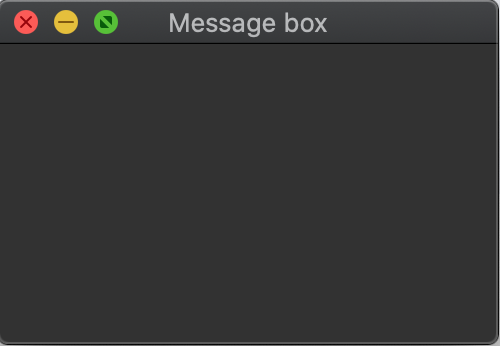 
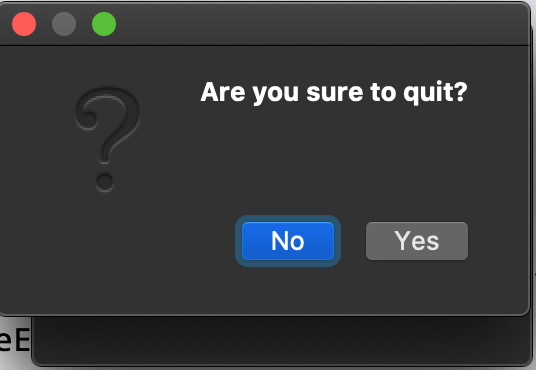

点击x按钮给出信息提示框

## 窗体中心对齐

In [3]:

"""
ZetCode PyQt5 tutorial

This program centers a window
on the screen.

Author: Jan Bodnar
Website: zetcode.com
"""

import sys
from PyQt5.QtWidgets import QWidget, QDesktopWidget, QApplication


class Example(QWidget):

    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):

        self.resize(250, 150)
        #调用自定义center函数
        self.center()

        self.setWindowTitle('Center')
        self.show()

    def center(self):

        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())


def main():

    app = QApplication(sys.argv)
    ex = Example()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

: 

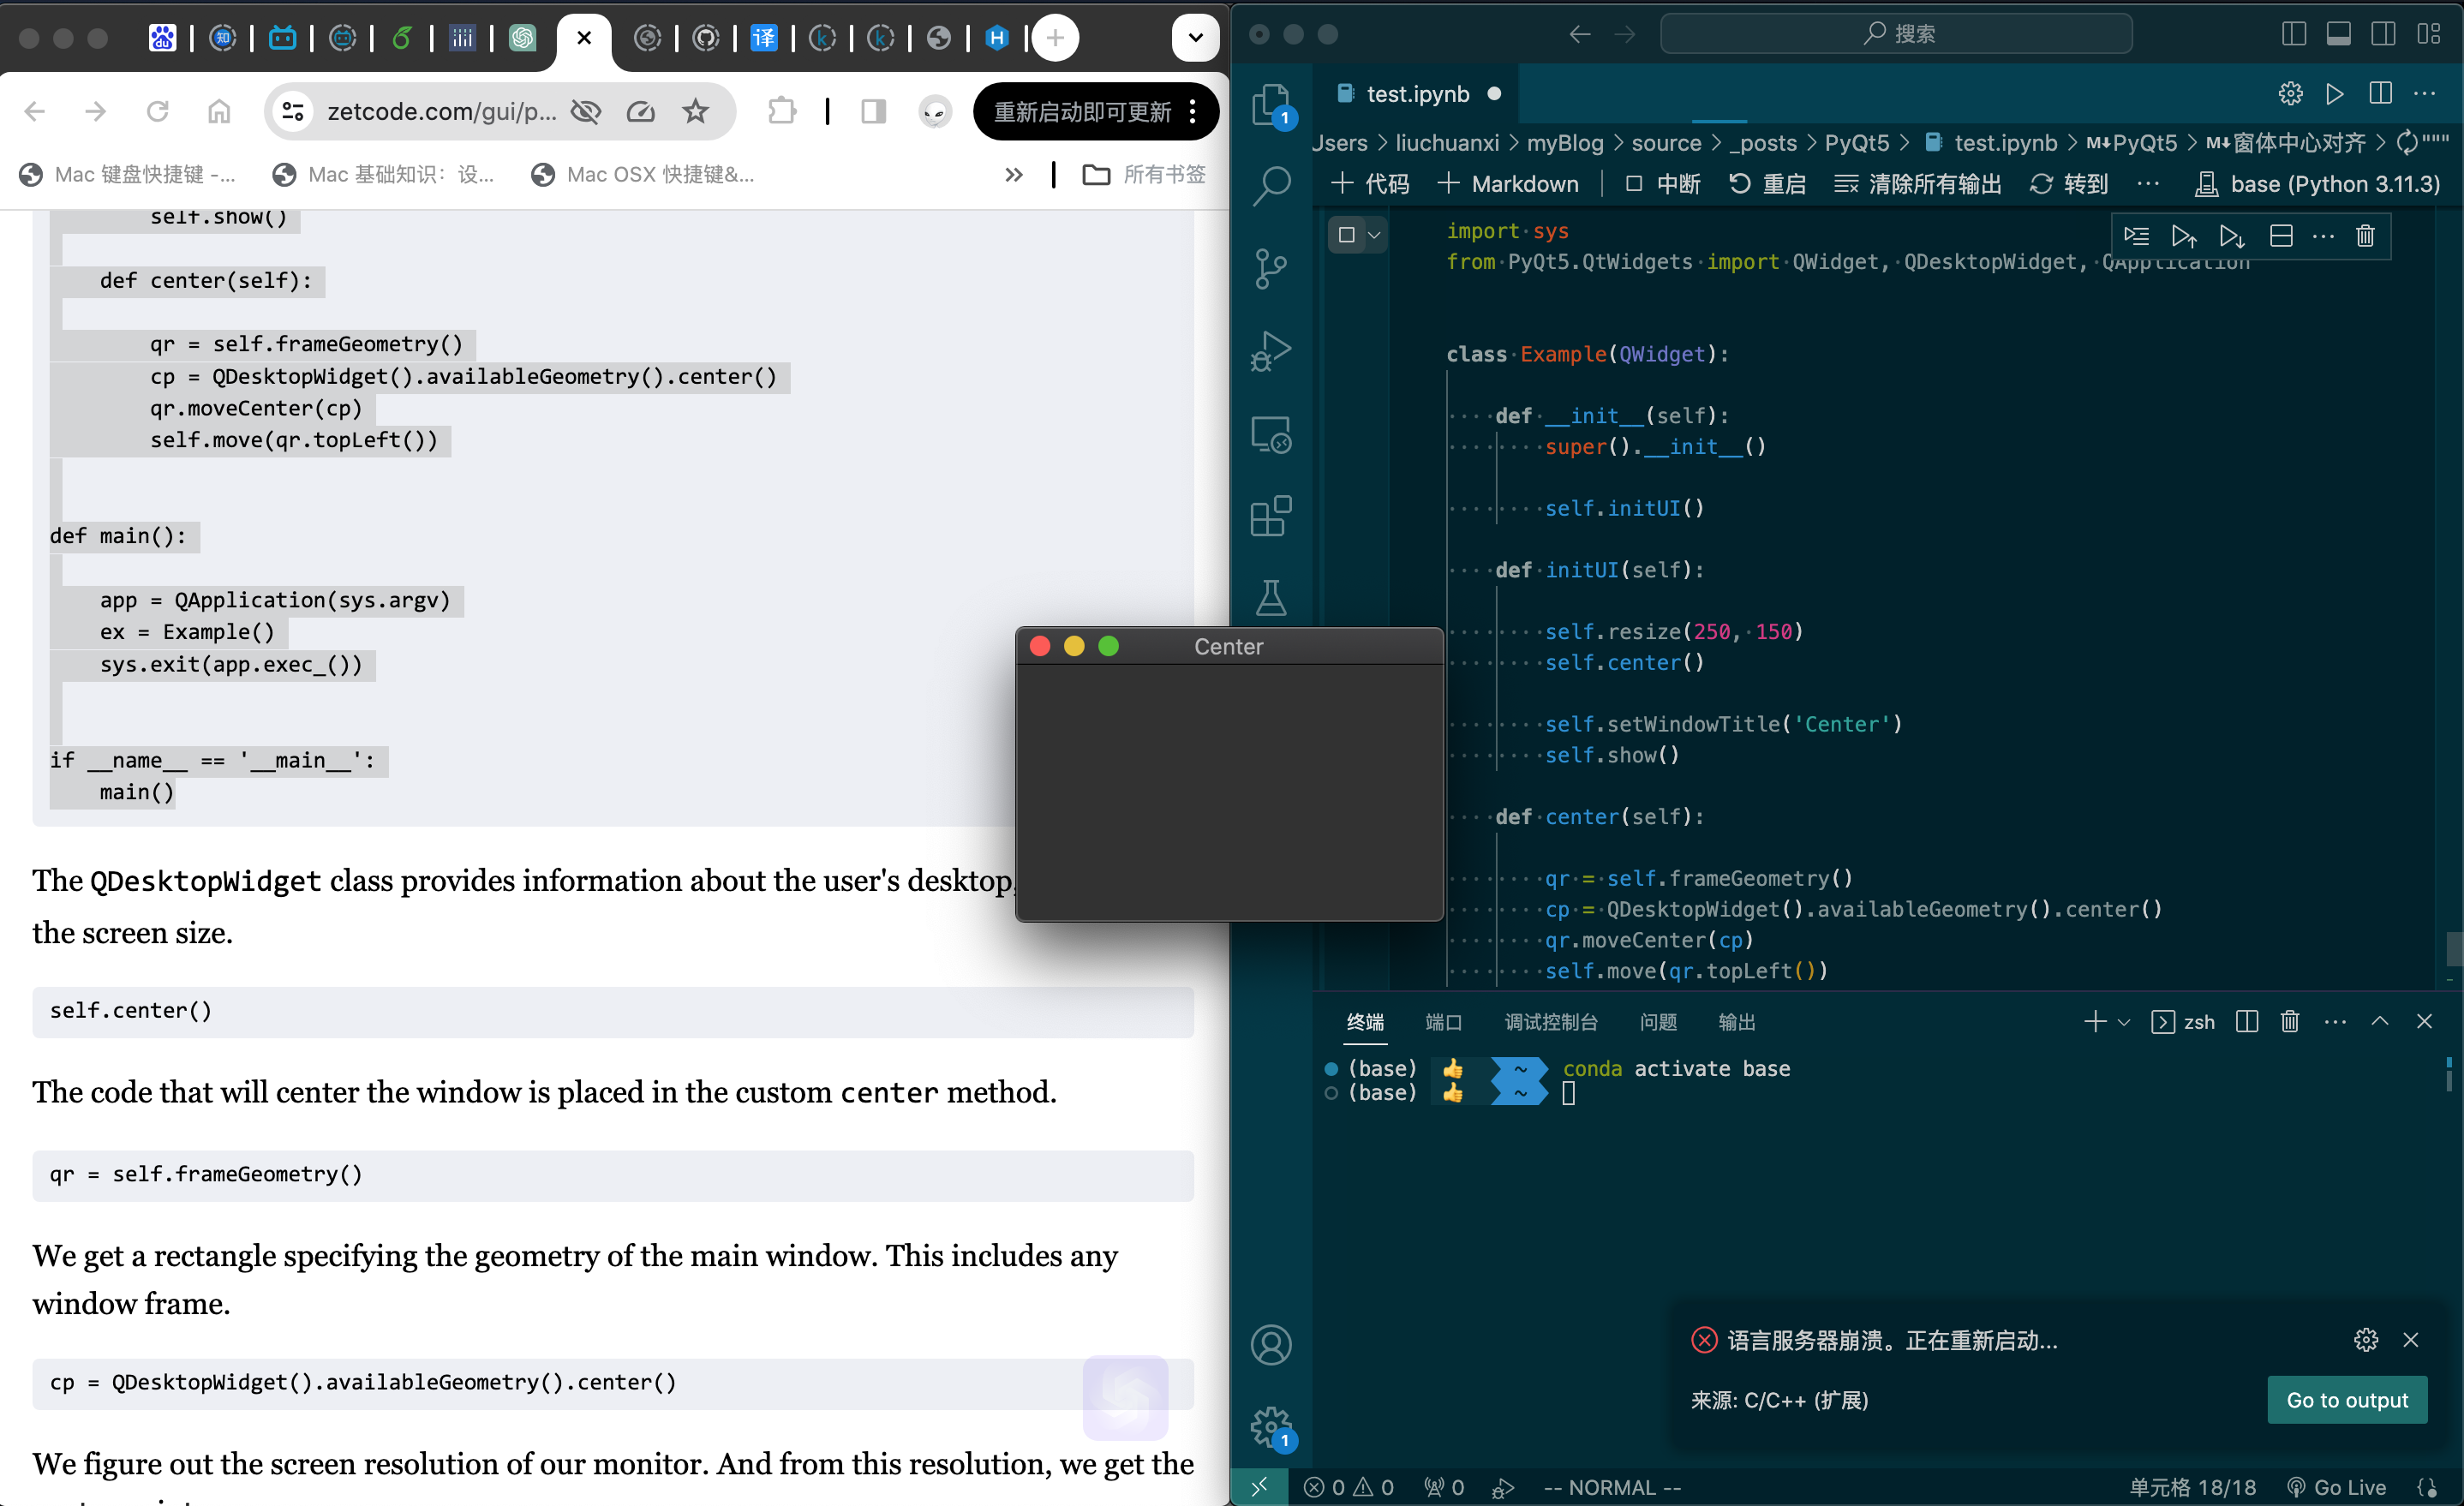
* QDesktopWidget提供用户桌面信息
    - QDesktopWidget().availableGeometry()获取屏幕的几何信息
    - cp = QDesktopWidget().availableGeometry().center()获取屏幕中心坐标
* qr = self.frameGeometry()获取窗体的矩形几何信息，包括左上点的坐标（相对屏幕）、宽高等
* qr.moveCenter(cp)将窗体的中心设置成屏幕的中心
* self.move(qr.topLeft())将应用窗体左上点移到矩形窗体的左上点


## 菜单、状态栏和工具条
